For this article we have used two dataset Imagenet 256*256 dataset and LSUN bedroom dataset. Both of these datasets contains more images. So we implemented the code using some imgaes collected from the dataset. The dataset description is given below,

 [ImageNet 256×256 Dataset](https://www.kaggle.com/datasets/dimensi0n/imagenet-256)Its contain 540,000 high-quality images grouped into 1,000 categories at 256×256 resolution.

[LUSN Dataset](https://www.kaggle.com/datasets/jhoward/lsun_bedroom)There are 303,125 jpgs containing bedroom images.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('/content/drive/MyDrive/2nd work code/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/2nd work code/Dataset/_0_1301.png
/content/drive/MyDrive/2nd work code/Dataset/_0_6073.png
/content/drive/MyDrive/2nd work code/Dataset/_0_1334.png
/content/drive/MyDrive/2nd work code/Dataset/_0_5307.png
/content/drive/MyDrive/2nd work code/Dataset/_0_3794.png
/content/drive/MyDrive/2nd work code/Dataset/_0_8224.png
/content/drive/MyDrive/2nd work code/Dataset/_0_4866.png
/content/drive/MyDrive/2nd work code/Dataset/_0_2858.png
/content/drive/MyDrive/2nd work code/Dataset/_0_7346.png
/content/drive/MyDrive/2nd work code/Dataset/_0_4723.png
/content/drive/MyDrive/2nd work code/Dataset/_0_3766.png
/content/drive/MyDrive/2nd work code/Dataset/D1/ant-016.jpg
/content/drive/MyDrive/2nd work code/Dataset/D1/bagel-006.jpg
/content/drive/MyDrive/2nd work code/Dataset/D1/bee-004.jpg
/content/drive/MyDrive/2nd work code/Dataset/D1/bulbul-020.jpg
/content/drive/MyDrive/2nd work code/Dataset/D1/Screenshot-2021-04-29-at-11.32.35-PM-300x300.png
/content/drive/MyDrive/2nd work

In [ ]:
pip install tensorflow

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 #model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam

In [ ]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

def assign_label(img,label):
    return label

**Pre Processing**

In [ ]:
pip install opencv-python numpy

Original Image:


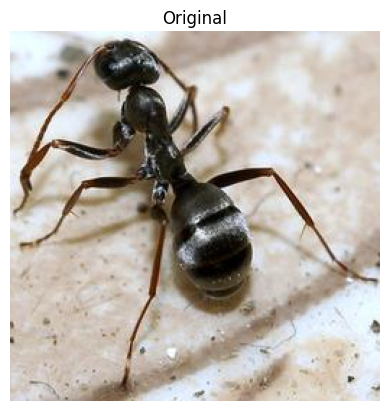

Preprocessed Image:


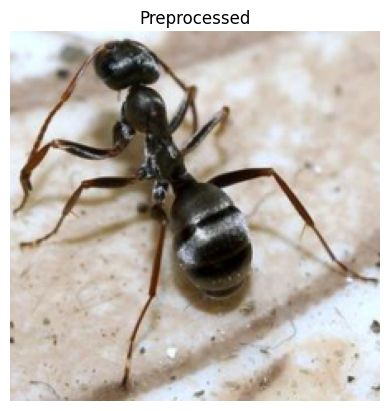

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# Path to your dataset
dataset_path = "/content/drive/MyDrive/2nd work code/Dataset/D1"
image_name = os.listdir(dataset_path)[0]  # Pick the first image
image_path = os.path.join(dataset_path, image_name)

# Load the image
image = Image.open(image_path).convert("RGB")

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize to 224x224
    transforms.ToTensor(),                     # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5],  # Normalize to [-1, 1]
                         std=[0.5, 0.5, 0.5])
])

# Apply preprocessing
preprocessed_image = preprocess(image)

# Show original and preprocessed image
def imshow(img_tensor, title):
    img = img_tensor.clone().detach()
    img = img * 0.5 + 0.5  # Unnormalize to [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot
print("Original Image:")
plt.imshow(image)
plt.title("Original")
plt.axis('off')
plt.show()

print("Preprocessed Image:")
imshow(preprocessed_image, "Preprocessed")


**Augmentation**

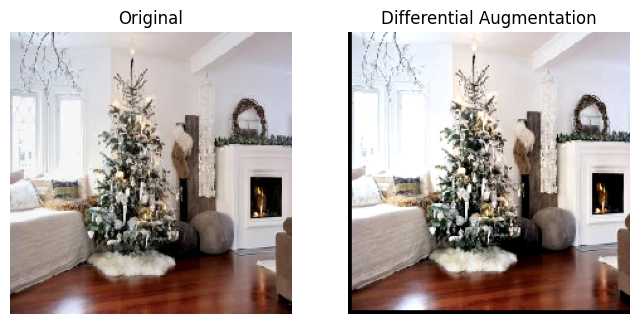

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load an example image and resize
img_path = '/content/drive/MyDrive/2nd work code/Dataset/D2/109552806c265875e50476715c759a6302d8827e.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
img = tf.keras.utils.img_to_array(img) / 255.0  # Normalize to [0, 1]
img = tf.expand_dims(img, 0)  # Add batch dimension

# Differential Augmentation Function
def diff_augment(image):
    # Random Color Jitter
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)

    # Random Translation
    image = tf.image.pad_to_bounding_box(image, 4, 4, 232, 232)  # pad 8 pixels
    image = tf.image.random_crop(image, size=[1, 224, 224, 3])

    # Random Horizontal Flip
    image = tf.image.random_flip_left_right(image)
    return image

# Apply augmentation
augmented_img = diff_augment(img)

# Plot original and augmented image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(augmented_img))
plt.title("Differential Augmentation")
plt.axis('off')

plt.show()


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/2nd work code/Dataset',
    image_size=(224, 224),
    batch_size=32
)

augmented_dataset = dataset.map(lambda x, y: (diff_augment(x), y))


Found 396 files belonging to 2 classes.


**Refine Stage**

In [ ]:
import torch
import torch.nn as nn

class DenoisingModule(nn.Module):
    def __init__(self):
        super(DenoisingModule, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1)
        )

    def forward(self, x):
        return self.block(x)
class DiffusionProcess:
    def __init__(self, timesteps=1000):
        self.timesteps = timesteps

    def forward(self, x0):
        # Add Gaussian noise progressively
        xt = x0
        for t in range(self.timesteps):
            noise = torch.randn_like(x0) * (1.0 / self.timesteps)
            xt = xt + noise
        return xt

    def reverse(self, xt, low_res_input, model):
        # Reverse process using U-Net + denoising
        for t in reversed(range(self.timesteps)):
            xt = model(torch.cat([xt, low_res_input], dim=1))
        return xt
class UpsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpsampleBlock, self).__init__()
        self.transconv = nn.ConvTranspose2d(in_channels, out_channels, 4, stride=2, padding=1)

    def forward(self, x):
        return self.transconv(x)

class UNet3D(nn.Module):
    def __init__(self):
        super(UNet3D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(1, 32, 3, padding=1), nn.ReLU(),
            nn.Conv3d(32, 64, 3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, 3, padding=1), nn.ReLU(),
            nn.Conv3d(32, 1, 3, padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
class SuperResolutionDiffusionModel(nn.Module):
    def __init__(self):
        super(SuperResolutionDiffusionModel, self).__init__()
        self.upsample = UpsampleBlock(3, 64)
        self.denoiser = DenoisingModule()
        self.unet3d = UNet3D()
        self.diffusion = DiffusionProcess()

    def forward(self, low_res_img):
        upsampled = self.upsample(low_res_img)
        denoised = self.denoiser(upsampled)
        xt = self.diffusion.forward(denoised)
        x0_reconstructed = self.diffusion.reverse(xt, low_res_img, self.denoiser)
        final_output = self.unet3d(x0_reconstructed.unsqueeze(1))  # Add depth for 3D U-Net
        return final_output


**Super-Resolution Stage**

In [ ]:
import torch
import torch.nn as nn

class HybridParamLoss(nn.Module):
    def __init__(self):
        super(HybridParamLoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, eps_pred, eps_true, x0_pred, x0_true):
        loss_eps = self.mse(eps_pred, eps_true)
        loss_x0 = self.mse(x0_pred, x0_true)
        return loss_eps + loss_x0
def ddim_sample(model, x_t, cond_input, timesteps):
    """
    Reverse denoising process using DDIM
    """
    for t in reversed(range(timesteps)):
        # Predict noise and clean image
        eps_pred, x0_pred = model(x_t, cond_input, t)
        # DDIM step: simplified deterministic update
        x_t = x0_pred + (1 - torch.cos(torch.tensor(t / timesteps * 3.14))) * eps_pred
    return x_t

class UNet3D(nn.Module):
    def __init__(self):
        super(UNet3D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv3d(32, 64, kernel_size=3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv3d(32, 1, kernel_size=3, padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
class HybridDenoiser(nn.Module):
    def __init__(self):
        super(HybridDenoiser, self).__init__()
        self.shared_encoder = nn.Sequential(
            nn.Conv2d(4, 64, 3, padding=1),  # assuming 1 channel x_t + 1 channel y
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU()
        )
        self.eps_head = nn.Conv2d(64, 1, 3, padding=1)   # noise prediction
        self.x0_head = nn.Conv2d(64, 1, 3, padding=1)    # clean image prediction

    def forward(self, x_t, y, t):
        # Concatenate condition and timestep (optional: use timestep embedding)
        x = torch.cat([x_t, y], dim=1)
        feat = self.shared_encoder(x)
        eps = self.eps_head(feat)
        x0 = self.x0_head(feat)
        return eps, x0
import os

# Assuming this is part of your dataset class's __init__ or a helper function
def list_image_files(directory):
    image_files = []
    for item_name in os.listdir(directory):
        item_path = os.path.join(directory, item_name)
        # Check if the item is a file and not a directory
        if os.path.isfile(item_path):
            image_files.append(item_path)
    return image_files

# Example of how to use list_image_files outside a class
dataset_directory = '/content/drive/MyDrive/2nd work code/Dataset'
valid_image_paths = list_image_files(dataset_directory)


**EDSRM**

In [ ]:
# SRUNet class definition
import torch
import torch.nn as nn
import numpy as np

class SRUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, features=64):
        super(SRUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, features, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(features, features, 3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(features, features, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(features, out_channels, 3, padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Diffusion class definition
import torch
import torch.nn as nn

def linear_beta_schedule(timesteps):
    beta_start = 1e-4
    beta_end = 0.02
    return torch.linspace(beta_start, beta_end, timesteps)

class Diffusion:
    def __init__(self, timesteps=1000):
        self.timesteps = timesteps
        self.betas = linear_beta_schedule(timesteps)
        self.alphas = 1. - self.betas
        self.alpha_hat = torch.cumprod(self.alphas, dim=0)

    def add_noise(self, x0, t, noise):
        sqrt_alpha_hat = self.alpha_hat[t]**0.5
        sqrt_one_minus = (1 - self.alpha_hat[t])**0.5
        return sqrt_alpha_hat * x0 + sqrt_one_minus * noise

In [ ]:
# EDSRM class definition
import torch
import torch.nn as nn
# from sr_unet import SRUNet  # Remove this import
# from diffusion import Diffusion # Remove this import

class EDSRM(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(EDSRM, self).__init__()
        # Assuming SRUNet and Diffusion classes are defined in previous cells
        # Make sure the Diffusion and SRUNet classes are defined in cells executed before this one
        self.diffusion = Diffusion(timesteps=1000)
        self.sr_net = SRUNet(in_channels, out_channels)

    def forward(self, low_res, t, noise=None):
        if noise is None:
            noise = torch.randn_like(low_res)
        # Ensure t is a tensor for indexing self.diffusion.alpha_hat
        if not isinstance(t, torch.Tensor):
             t = torch.tensor(t)
        noised_input = self.diffusion.add_noise(low_res, t, noise)
        refined_output = self.sr_net(noised_input)
        return refined_output

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torchvision.transforms import ToTensor
import cv2
from glob import glob
from torchvision.transforms import Compose, Resize, ToTensor
import torchvision.utils as vutils
from PIL import Image

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/2nd work code/Dataset"))

['D1', 'D2', '_0_1301.png', '_0_6073.png', '_0_1334.png', '_0_5307.png', '_0_3794.png', '_0_8224.png', '_0_4866.png', '_0_2858.png', '_0_7346.png', '_0_4723.png', '_0_3766.png']


In [ ]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from PIL import Image
import numpy as np
import os

class PatchDataset(Dataset):
    def __init__(self, hr_dir, crop_size=96, scale=4):
        self.hr_dir = hr_dir
        self.crop_size = crop_size
        self.scale = scale
        self.hr_images = sorted([
            os.path.join(hr_dir, x) for x in os.listdir(hr_dir) if x.endswith('.png')
        ])

    def __len__(self):
        return len(self.hr_images)

    def __getitem__(self, idx):
        hr_image = Image.open(self.hr_images[idx]).convert('RGB')

        # Random crop from HR image
        x = np.random.randint(0, hr_image.width - self.crop_size + 1)
        y = np.random.randint(0, hr_image.height - self.crop_size + 1)
        hr_crop = hr_image.crop((x, y, x + self.crop_size, y + self.crop_size))

        # Downscale to LR using bicubic
        lr_crop = hr_crop.resize((self.crop_size // self.scale, self.crop_size // self.scale), Image.BICUBIC)

        # Optional augmentations: random horizontal and vertical flip
        if np.random.rand() < 0.5:
            hr_crop = hr_crop.transpose(Image.FLIP_LEFT_RIGHT)
            lr_crop = lr_crop.transpose(Image.FLIP_LEFT_RIGHT)
        if np.random.rand() < 0.5:
            hr_crop = hr_crop.transpose(Image.FLIP_TOP_BOTTOM)
            lr_crop = lr_crop.transpose(Image.FLIP_TOP_BOTTOM)

        return ToTensor()(lr_crop), ToTensor()(hr_crop)

In [ ]:
class Config:
    def __init__(self):
        self.hr_dir = "/content/drive/MyDrive/2nd work code/Dataset"


        self.lr_dir = None

        self.scale = 4
        self.crop_size = 96
        self.epochs = 100
        self.batch_size = 32  #
        self.lr = 1e-4
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # EDSR-specific model params
        self.n_resblocks = 32
        self.n_feats = 256
        self.res_scale = 0.1

        # Learning rate scheduler
        self.use_scheduler = True
        self.scheduler_type = 'cosine'

In [ ]:
def calc_psnr(sr, hr, max_val=1.0):
    sr = sr.clamp(0.0, 1.0)
    hr = hr.clamp(0.0, 1.0)
    mse = torch.mean((sr - hr) ** 2)
    eps = 1e-10  # small constant for numerical stability
    if mse < eps:
        return float('inf')
    psnr = 20 * torch.log10(max_val / torch.sqrt(mse + eps))
    return psnr.item()

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# --- MeanShift (for normalization and denormalization) ---
class MeanShift(nn.Conv2d):
    def __init__(self, rgb_range=1.0, rgb_mean=(0.4488, 0.4371, 0.4040),
                 rgb_std=(1.0, 1.0, 1.0), sign=-1):
        super(MeanShift, self).__init__(3, 3, kernel_size=1)
        std = torch.Tensor(rgb_std)
        self.weight.data = torch.eye(3).view(3, 3, 1, 1) / std.view(3, 1, 1, 1)
        self.bias.data = sign * rgb_range * torch.Tensor(rgb_mean) / std
        for p in self.parameters():
            p.requires_grad = False

# --- Residual Block ---
class ResBlock(nn.Module):
    def __init__(self, n_feats=256, kernel_size=3, res_scale=0.1, bias=True):
        super(ResBlock, self).__init__()
        self.body = nn.Sequential(
            nn.Conv2d(n_feats, n_feats, kernel_size, padding=1, bias=bias),
            nn.ReLU(inplace=True),
            nn.Conv2d(n_feats, n_feats, kernel_size, padding=1, bias=bias)
        )
        self.res_scale = res_scale

    def forward(self, x):
        res = self.body(x).mul(self.res_scale)
        return res + x

# --- Upsampler ---
class Upsampler(nn.Sequential):
    def __init__(self, scale, n_feats=256):
        layers = []
        if scale in [2, 4]:
            for _ in range(int(np.log2(scale))):
                layers += [
                    nn.Conv2d(n_feats, n_feats * 4, kernel_size=3, stride=1, padding=1),
                    nn.PixelShuffle(2)
                ]
        elif scale == 3:
            layers += [
                nn.Conv2d(n_feats, n_feats * 9, kernel_size=3, stride=1, padding=1),
                nn.PixelShuffle(3)
            ]
        else:
            raise ValueError(f"Unsupported scale: {scale}")
        super(Upsampler, self).__init__(*layers)

# --- Full EDSR Model ---
class EDSR(nn.Module):
    def __init__(self, config):
        super(EDSR, self).__init__()
        n_resblocks = config.n_resblocks
        n_feats = config.n_feats
        res_scale = config.res_scale
        scale = config.scale

        self.sub_mean = MeanShift(rgb_range=1.0, sign=-1)
        self.add_mean = MeanShift(rgb_range=1.0, sign=1)

        # Head
        self.head = nn.Conv2d(3, n_feats, kernel_size=3, padding=1)

        # Body
        body = [ResBlock(n_feats=n_feats, res_scale=res_scale) for _ in range(n_resblocks)]
        body.append(nn.Conv2d(n_feats, n_feats, kernel_size=3, padding=1))
        self.body = nn.Sequential(*body)

        # Tail (upsampling)
        self.tail = nn.Sequential(
            Upsampler(scale, n_feats),
            nn.Conv2d(n_feats, 3, kernel_size=3, padding=1)
        )

    def forward(self, x):
        x = self.sub_mean(x)
        x = self.head(x)
        res = self.body(x)
        x = res + x
        x = self.tail(x)
        x = self.add_mean(x)
        return x

In [ ]:
from torch.utils.data import random_split, DataLoader

# 1. Dataset
config = Config()
full_dataset = PatchDataset(
    hr_dir=config.hr_dir,
    crop_size=config.crop_size,
    scale=config.scale
)
print(f"Total patches: {len(full_dataset)}")

# 2. Train/Val split
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
print(f"Train: {train_size}, Val: {val_size}")

# 3. DataLoaders
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=2, pin_memory=True)

# 4. Model
model = EDSR(config).to(config.device)

Total patches: 11
Train: 9, Val: 2


In [ ]:
print("First 3 HR image paths:", full_dataset.hr_images[:3])

First 3 HR image paths: ['/content/drive/MyDrive/2nd work code/Dataset/_0_1301.png', '/content/drive/MyDrive/2nd work code/Dataset/_0_1334.png', '/content/drive/MyDrive/2nd work code/Dataset/_0_2858.png']


In [ ]:
import os
import torch

def save_checkpoint(model, epoch, save_dir="checkpoints"):
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"edsr_epoch{epoch}.pth")
    torch.save(model.state_dict(), save_path)
    print(f" Checkpoint saved: {save_path}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Loss, optimizer, scheduler
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=config.lr)

if config.use_scheduler:
    if config.scheduler_type == 'cosine':
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=config.epochs)
    elif config.scheduler_type == 'step':
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)
    else:
        scheduler = None
else:
    scheduler = None

def train_one_epoch(epoch):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{config.epochs}]")
    for lr, hr in loop:
        lr, hr = lr.to(config.device), hr.to(config.device)
        sr = model(lr)
        loss = criterion(sr, hr)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    return running_loss / len(train_loader)

def validate():
    model.eval()
    total_psnr = 0.0
    with torch.no_grad():
        for lr, hr in val_loader:
            lr, hr = lr.to(config.device), hr.to(config.device)
            sr = model(lr)
            psnr = calc_psnr(sr, hr)
            total_psnr += psnr
    return total_psnr / len(val_loader)

# Training loop
best_val_psnr = 0.0
for epoch in range(config.epochs):
    train_loss = train_one_epoch(epoch)
    val_psnr = validate()
    print(f"Validation PSNR: {val_psnr:.2f} dB")

    if scheduler:
        scheduler.step()

    # Save best model
    if val_psnr > best_val_psnr:
        best_val_psnr = val_psnr
        torch.save(model.state_dict(), "best_edsr.pth")
        print(f"New best model saved with PSNR: {val_psnr:.2f} dB")
    if (epoch + 1) % 10 == 0:
        save_checkpoint(model, epoch)

Epoch [1/100]: 100%|██████████| 1/1 [00:38<00:00, 38.47s/it, loss=0.188]


Validation PSNR: 16.69 dB
New best model saved with PSNR: 16.69 dB


Epoch [2/100]: 100%|██████████| 1/1 [00:35<00:00, 35.71s/it, loss=0.149]


Validation PSNR: 17.62 dB
New best model saved with PSNR: 17.62 dB


Epoch [3/100]: 100%|██████████| 1/1 [00:36<00:00, 36.12s/it, loss=0.0985]


Validation PSNR: 18.50 dB
New best model saved with PSNR: 18.50 dB


Epoch [4/100]: 100%|██████████| 1/1 [00:33<00:00, 33.37s/it, loss=0.114]


Validation PSNR: 21.61 dB
New best model saved with PSNR: 21.61 dB


Epoch [5/100]: 100%|██████████| 1/1 [00:34<00:00, 34.57s/it, loss=0.113]


Validation PSNR: 22.11 dB
New best model saved with PSNR: 22.11 dB


Epoch [6/100]: 100%|██████████| 1/1 [00:37<00:00, 37.42s/it, loss=0.0902]


Validation PSNR: 21.25 dB


Epoch [7/100]: 100%|██████████| 1/1 [00:34<00:00, 34.87s/it, loss=0.0817]


Validation PSNR: 19.27 dB


Epoch [8/100]: 100%|██████████| 1/1 [00:35<00:00, 35.34s/it, loss=0.0848]


Validation PSNR: 21.27 dB


Epoch [9/100]: 100%|██████████| 1/1 [00:33<00:00, 33.39s/it, loss=0.0759]


Validation PSNR: 20.11 dB


Epoch [10/100]: 100%|██████████| 1/1 [00:35<00:00, 35.28s/it, loss=0.0767]


Validation PSNR: 21.54 dB
 Checkpoint saved: checkpoints/edsr_epoch9.pth


Epoch [11/100]: 100%|██████████| 1/1 [00:33<00:00, 33.77s/it, loss=0.0673]


Validation PSNR: 21.12 dB


Epoch [12/100]: 100%|██████████| 1/1 [00:34<00:00, 34.93s/it, loss=0.0686]


Validation PSNR: 20.84 dB


Epoch [13/100]: 100%|██████████| 1/1 [00:33<00:00, 33.23s/it, loss=0.0663]


Validation PSNR: 22.19 dB
New best model saved with PSNR: 22.19 dB


Epoch [14/100]: 100%|██████████| 1/1 [00:34<00:00, 34.60s/it, loss=0.0632]


Validation PSNR: 20.89 dB


Epoch [15/100]: 100%|██████████| 1/1 [00:35<00:00, 35.08s/it, loss=0.053]


Validation PSNR: 21.50 dB


Epoch [16/100]: 100%|██████████| 1/1 [00:34<00:00, 34.33s/it, loss=0.071]


Validation PSNR: 20.34 dB


Epoch [17/100]: 100%|██████████| 1/1 [00:33<00:00, 33.19s/it, loss=0.0544]


Validation PSNR: 22.60 dB
New best model saved with PSNR: 22.60 dB


Epoch [18/100]: 100%|██████████| 1/1 [00:33<00:00, 33.58s/it, loss=0.0571]


Validation PSNR: 20.49 dB


Epoch [19/100]: 100%|██████████| 1/1 [00:33<00:00, 33.42s/it, loss=0.0583]


Validation PSNR: 22.70 dB
New best model saved with PSNR: 22.70 dB


Epoch [20/100]: 100%|██████████| 1/1 [00:33<00:00, 33.36s/it, loss=0.0557]


Validation PSNR: 20.85 dB
 Checkpoint saved: checkpoints/edsr_epoch19.pth


Epoch [21/100]: 100%|██████████| 1/1 [00:33<00:00, 33.72s/it, loss=0.0555]


Validation PSNR: 22.66 dB


Epoch [22/100]: 100%|██████████| 1/1 [00:36<00:00, 36.83s/it, loss=0.0548]


Validation PSNR: 26.02 dB
New best model saved with PSNR: 26.02 dB


Epoch [23/100]: 100%|██████████| 1/1 [00:35<00:00, 35.75s/it, loss=0.0441]


Validation PSNR: 22.95 dB


Epoch [24/100]: 100%|██████████| 1/1 [00:33<00:00, 33.47s/it, loss=0.0527]


Validation PSNR: 25.23 dB


Epoch [25/100]: 100%|██████████| 1/1 [00:34<00:00, 34.05s/it, loss=0.0479]


Validation PSNR: 21.11 dB


Epoch [26/100]: 100%|██████████| 1/1 [00:33<00:00, 33.14s/it, loss=0.0442]


Validation PSNR: 22.80 dB


Epoch [27/100]: 100%|██████████| 1/1 [00:34<00:00, 34.33s/it, loss=0.0483]


Validation PSNR: 22.84 dB


Epoch [28/100]: 100%|██████████| 1/1 [00:33<00:00, 33.25s/it, loss=0.0456]


Validation PSNR: 22.96 dB


Epoch [29/100]: 100%|██████████| 1/1 [00:33<00:00, 33.64s/it, loss=0.0484]


Validation PSNR: 21.96 dB


Epoch [30/100]: 100%|██████████| 1/1 [00:33<00:00, 33.06s/it, loss=0.0494]


Validation PSNR: 23.43 dB
 Checkpoint saved: checkpoints/edsr_epoch29.pth


Epoch [31/100]: 100%|██████████| 1/1 [00:36<00:00, 36.71s/it, loss=0.0417]


Validation PSNR: 23.72 dB


Epoch [32/100]: 100%|██████████| 1/1 [00:35<00:00, 35.20s/it, loss=0.041]


Validation PSNR: 24.75 dB


Epoch [33/100]: 100%|██████████| 1/1 [00:32<00:00, 32.99s/it, loss=0.0477]


Validation PSNR: 22.37 dB


Epoch [34/100]: 100%|██████████| 1/1 [00:40<00:00, 40.20s/it, loss=0.0438]


Validation PSNR: 26.89 dB
New best model saved with PSNR: 26.89 dB


Epoch [35/100]: 100%|██████████| 1/1 [00:42<00:00, 42.67s/it, loss=0.043]


Validation PSNR: 22.42 dB


Epoch [36/100]: 100%|██████████| 1/1 [00:39<00:00, 39.14s/it, loss=0.0434]


Validation PSNR: 23.21 dB


Epoch [37/100]: 100%|██████████| 1/1 [00:44<00:00, 44.57s/it, loss=0.044]


Validation PSNR: 24.76 dB


Epoch [38/100]: 100%|██████████| 1/1 [00:48<00:00, 48.14s/it, loss=0.043]


Validation PSNR: 22.38 dB


Epoch [39/100]: 100%|██████████| 1/1 [00:45<00:00, 45.24s/it, loss=0.042]


Validation PSNR: 23.12 dB


Epoch [40/100]: 100%|██████████| 1/1 [00:36<00:00, 36.59s/it, loss=0.0383]


Validation PSNR: 25.14 dB
 Checkpoint saved: checkpoints/edsr_epoch39.pth


Epoch [41/100]: 100%|██████████| 1/1 [00:48<00:00, 48.06s/it, loss=0.0476]


Validation PSNR: 22.62 dB


Epoch [42/100]: 100%|██████████| 1/1 [00:42<00:00, 42.68s/it, loss=0.0364]


Validation PSNR: 24.45 dB


Epoch [43/100]: 100%|██████████| 1/1 [00:41<00:00, 41.17s/it, loss=0.0356]


Validation PSNR: 22.82 dB


Epoch [44/100]: 100%|██████████| 1/1 [00:46<00:00, 46.66s/it, loss=0.0434]


Validation PSNR: 24.58 dB


Epoch [45/100]: 100%|██████████| 1/1 [00:37<00:00, 37.20s/it, loss=0.0355]


Validation PSNR: 24.14 dB


Epoch [46/100]: 100%|██████████| 1/1 [00:33<00:00, 33.55s/it, loss=0.0412]


Validation PSNR: 23.20 dB


Epoch [47/100]: 100%|██████████| 1/1 [00:35<00:00, 35.08s/it, loss=0.0387]


Validation PSNR: 22.87 dB


Epoch [48/100]: 100%|██████████| 1/1 [00:37<00:00, 37.22s/it, loss=0.0398]


Validation PSNR: 23.31 dB


Epoch [49/100]: 100%|██████████| 1/1 [00:34<00:00, 34.97s/it, loss=0.0377]


Validation PSNR: 24.30 dB


Epoch [50/100]: 100%|██████████| 1/1 [00:39<00:00, 39.74s/it, loss=0.0366]


Validation PSNR: 23.02 dB
 Checkpoint saved: checkpoints/edsr_epoch49.pth


Epoch [51/100]: 100%|██████████| 1/1 [00:33<00:00, 33.02s/it, loss=0.0389]


Validation PSNR: 23.40 dB


Epoch [52/100]: 100%|██████████| 1/1 [00:40<00:00, 40.45s/it, loss=0.0346]


Validation PSNR: 24.57 dB


Epoch [53/100]: 100%|██████████| 1/1 [00:33<00:00, 33.69s/it, loss=0.0341]


Validation PSNR: 25.11 dB


Epoch [54/100]: 100%|██████████| 1/1 [00:34<00:00, 34.07s/it, loss=0.0383]


Validation PSNR: 26.13 dB


Epoch [55/100]: 100%|██████████| 1/1 [00:35<00:00, 35.20s/it, loss=0.0368]


Validation PSNR: 24.30 dB


Epoch [56/100]: 100%|██████████| 1/1 [00:33<00:00, 33.37s/it, loss=0.0325]


Validation PSNR: 23.96 dB


Epoch [57/100]: 100%|██████████| 1/1 [00:33<00:00, 33.63s/it, loss=0.035]


Validation PSNR: 23.44 dB


Epoch [58/100]: 100%|██████████| 1/1 [00:32<00:00, 32.71s/it, loss=0.033]


Validation PSNR: 25.75 dB


Epoch [59/100]: 100%|██████████| 1/1 [00:33<00:00, 33.10s/it, loss=0.0324]


Validation PSNR: 23.06 dB


Epoch [60/100]: 100%|██████████| 1/1 [00:32<00:00, 32.78s/it, loss=0.0398]


Validation PSNR: 23.50 dB
 Checkpoint saved: checkpoints/edsr_epoch59.pth


Epoch [61/100]: 100%|██████████| 1/1 [00:33<00:00, 33.49s/it, loss=0.0308]


Validation PSNR: 23.25 dB


Epoch [62/100]: 100%|██████████| 1/1 [00:32<00:00, 32.89s/it, loss=0.0392]


Validation PSNR: 24.98 dB


Epoch [63/100]: 100%|██████████| 1/1 [00:33<00:00, 33.72s/it, loss=0.0369]


Validation PSNR: 23.83 dB


Epoch [64/100]: 100%|██████████| 1/1 [00:32<00:00, 32.68s/it, loss=0.0333]


Validation PSNR: 27.84 dB
New best model saved with PSNR: 27.84 dB


Epoch [65/100]: 100%|██████████| 1/1 [00:33<00:00, 33.63s/it, loss=0.0374]


Validation PSNR: 27.50 dB


Epoch [66/100]: 100%|██████████| 1/1 [00:32<00:00, 32.76s/it, loss=0.0333]


Validation PSNR: 25.48 dB


Epoch [67/100]: 100%|██████████| 1/1 [00:33<00:00, 33.19s/it, loss=0.0332]


Validation PSNR: 24.57 dB


Epoch [68/100]: 100%|██████████| 1/1 [00:32<00:00, 32.79s/it, loss=0.0364]


Validation PSNR: 23.32 dB


Epoch [69/100]: 100%|██████████| 1/1 [00:33<00:00, 33.40s/it, loss=0.0349]


Validation PSNR: 25.56 dB


Epoch [70/100]: 100%|██████████| 1/1 [00:40<00:00, 40.67s/it, loss=0.0376]


Validation PSNR: 25.70 dB
 Checkpoint saved: checkpoints/edsr_epoch69.pth


Epoch [71/100]: 100%|██████████| 1/1 [00:34<00:00, 34.88s/it, loss=0.0369]


Validation PSNR: 26.02 dB


Epoch [72/100]: 100%|██████████| 1/1 [00:32<00:00, 32.85s/it, loss=0.0317]


Validation PSNR: 26.40 dB


Epoch [73/100]: 100%|██████████| 1/1 [00:34<00:00, 34.28s/it, loss=0.0344]


Validation PSNR: 26.24 dB


Epoch [74/100]: 100%|██████████| 1/1 [00:32<00:00, 32.95s/it, loss=0.0311]


Validation PSNR: 23.84 dB


Epoch [75/100]: 100%|██████████| 1/1 [00:34<00:00, 34.36s/it, loss=0.0324]


Validation PSNR: 24.60 dB


Epoch [76/100]: 100%|██████████| 1/1 [00:34<00:00, 34.60s/it, loss=0.0339]


Validation PSNR: 24.17 dB


Epoch [77/100]: 100%|██████████| 1/1 [00:33<00:00, 33.74s/it, loss=0.0277]


Validation PSNR: 24.26 dB


Epoch [78/100]: 100%|██████████| 1/1 [00:33<00:00, 33.00s/it, loss=0.0315]


Validation PSNR: 25.39 dB


Epoch [79/100]: 100%|██████████| 1/1 [00:33<00:00, 33.56s/it, loss=0.0308]


Validation PSNR: 27.11 dB


Epoch [80/100]: 100%|██████████| 1/1 [00:33<00:00, 33.14s/it, loss=0.033]


Validation PSNR: 24.60 dB
 Checkpoint saved: checkpoints/edsr_epoch79.pth


Epoch [81/100]: 100%|██████████| 1/1 [00:33<00:00, 33.91s/it, loss=0.0302]


Validation PSNR: 24.74 dB


Epoch [82/100]: 100%|██████████| 1/1 [00:33<00:00, 33.21s/it, loss=0.0307]


Validation PSNR: 24.20 dB


Epoch [83/100]: 100%|██████████| 1/1 [00:35<00:00, 35.71s/it, loss=0.0313]


Validation PSNR: 27.62 dB


Epoch [84/100]: 100%|██████████| 1/1 [00:34<00:00, 34.91s/it, loss=0.037]


Validation PSNR: 24.63 dB


Epoch [85/100]: 100%|██████████| 1/1 [00:33<00:00, 33.71s/it, loss=0.0376]


Validation PSNR: 23.19 dB


Epoch [86/100]: 100%|██████████| 1/1 [00:41<00:00, 41.77s/it, loss=0.0339]


Validation PSNR: 25.02 dB


Epoch [87/100]: 100%|██████████| 1/1 [00:33<00:00, 33.97s/it, loss=0.0351]


Validation PSNR: 26.28 dB


Epoch [88/100]: 100%|██████████| 1/1 [00:33<00:00, 33.44s/it, loss=0.0339]


Validation PSNR: 25.26 dB


Epoch [89/100]: 100%|██████████| 1/1 [00:34<00:00, 34.58s/it, loss=0.0326]


Validation PSNR: 25.29 dB


Epoch [90/100]: 100%|██████████| 1/1 [00:34<00:00, 34.48s/it, loss=0.0331]


Validation PSNR: 26.88 dB
 Checkpoint saved: checkpoints/edsr_epoch89.pth


Epoch [91/100]: 100%|██████████| 1/1 [00:35<00:00, 35.99s/it, loss=0.0351]


Validation PSNR: 24.36 dB


Epoch [92/100]: 100%|██████████| 1/1 [00:34<00:00, 34.52s/it, loss=0.0313]


Validation PSNR: 25.33 dB


Epoch [93/100]: 100%|██████████| 1/1 [00:34<00:00, 34.75s/it, loss=0.0336]


Validation PSNR: 24.70 dB


Epoch [94/100]: 100%|██████████| 1/1 [00:34<00:00, 34.61s/it, loss=0.0378]


Validation PSNR: 26.03 dB


Epoch [95/100]: 100%|██████████| 1/1 [00:33<00:00, 33.39s/it, loss=0.0308]


Validation PSNR: 26.35 dB


Epoch [96/100]: 100%|██████████| 1/1 [00:33<00:00, 33.10s/it, loss=0.0284]


Validation PSNR: 25.62 dB


Epoch [97/100]: 100%|██████████| 1/1 [00:32<00:00, 32.96s/it, loss=0.0318]


Validation PSNR: 23.49 dB


Epoch [98/100]: 100%|██████████| 1/1 [00:33<00:00, 33.00s/it, loss=0.0374]


Validation PSNR: 24.01 dB


Epoch [99/100]: 100%|██████████| 1/1 [00:34<00:00, 34.14s/it, loss=0.0346]


Validation PSNR: 25.15 dB


Epoch [100/100]: 100%|██████████| 1/1 [00:34<00:00, 34.21s/it, loss=0.0332]


Validation PSNR: 23.86 dB
 Checkpoint saved: checkpoints/edsr_epoch99.pth


Best model loaded.


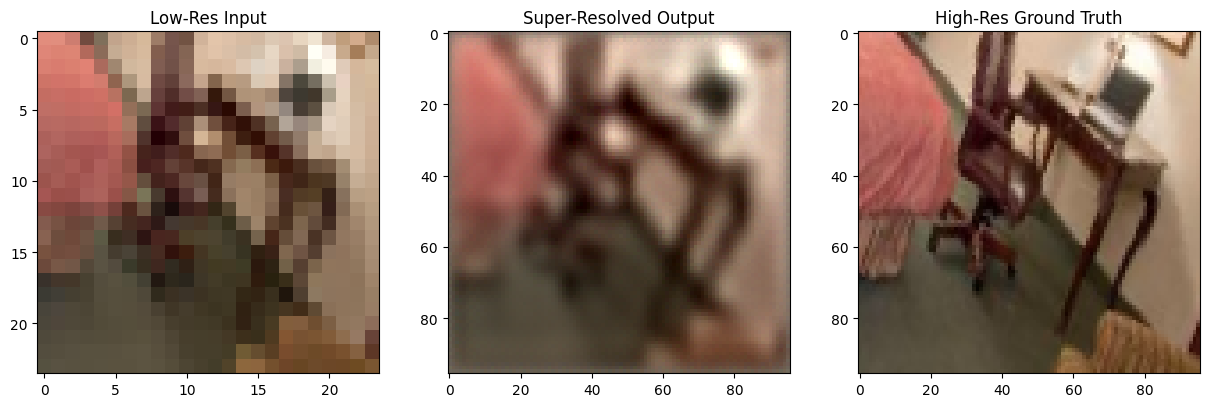

 PSNR on sample patch: 23.30 dB


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Load best model
model = EDSR(config).to(config.device)
model.load_state_dict(torch.load("best_edsr.pth", map_location=config.device))
model.eval()
print("Best model loaded.")

# Load one HR test image
test_hr_image = Image.open(full_dataset.hr_images[0]).convert("RGB")

# Crop a patch and generate LR version
x = np.random.randint(0, test_hr_image.width - config.crop_size + 1)
y = np.random.randint(0, test_hr_image.height - config.crop_size + 1)
hr_crop = test_hr_image.crop((x, y, x + config.crop_size, y + config.crop_size))
lr_crop = hr_crop.resize((config.crop_size // config.scale, config.crop_size // config.scale), Image.BICUBIC)

# Convert to tensor and run model
lr_tensor = T.ToTensor()(lr_crop).unsqueeze(0).to(config.device)  # shape: (1, 3, H, W)
with torch.no_grad():
    sr_tensor = model(lr_tensor).clamp(0.0, 1.0)

# Convert tensors to images for visualization
to_pil = T.ToPILImage()
lr_vis = to_pil(lr_tensor.squeeze(0).cpu())
sr_vis = to_pil(sr_tensor.squeeze(0).cpu())
hr_vis = hr_crop

# Show images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(lr_vis); plt.title("Low-Res Input")
plt.subplot(1, 3, 2); plt.imshow(sr_vis); plt.title("Super-Resolved Output")
plt.subplot(1, 3, 3); plt.imshow(hr_vis); plt.title("High-Res Ground Truth")
plt.show()

# Optional: Calculate PSNR
psnr_val = calc_psnr(sr_tensor.squeeze(0).cpu(), T.ToTensor()(hr_vis))
print(f" PSNR on sample patch: {psnr_val:.2f} dB")